In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

def load_housing_data(housing_path='data'):
    train_csv_path = os.path.join(housing_path, "train.csv")
    test_csv_path = os.path.join(housing_path, "test.csv")
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train, test = load_housing_data()

In [4]:
train = train.drop((train[train['GrLivArea'] > 4500]).index)
train = train.drop((train[train['1stFlrSF'] > 4000]).index)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-n

In [8]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
Id              -0.021673
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePr

In [62]:
num_att = list(train.select_dtypes([np.number]).columns)

# att = ['OverallQual', 'GrLivArea']

# to_remove = ['BsmtFinSF2', 'MoSold', '3SsnPorch', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold',
#             'PoolArea', 'OverallCond', 'MSSubClass', 'ScreenPorch']

to_remove = ['PoolArea', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'ScreenPorch', '3SsnPorch',
            'BsmtFinSF2', 'MoSold', 'YrSold',
            'GarageArea', 'TotalBsmtSF']

to_remove = ['PoolArea', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'ScreenPorch', '3SsnPorch',
            'BsmtFinSF2', 'MoSold']

for t in to_remove:
    num_att.remove(t)
num_att.remove('Id')
num_att.remove('SalePrice')

# num_att = ['OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF', 'FullBath', 'YearBuilt']

print(num_att)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'YrSold']


In [11]:
train.info()
# train.select_dtypes(include=['object'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-n

In [42]:
cat_att = ['BldgType', 'CentralAir', 'Foundation', 
           'PavedDrive', 'SaleCondition']
cat_att = ['Neighborhood', 'BldgType', 'Heating', 'HeatingQC', 'CentralAir', 
           'Street', 'LotShape', 'LandContour', 'LotConfig',
           'LandSlope', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl',
           'ExterQual', 'ExterCond', 'Foundation', 'PavedDrive', 'SaleCondition']

# TO ADD = Exterior1st, KitchenQual, Functional, SaleType

# cat_att = ['Neighborhood', 'BldgType']
print(cat_att)

['Neighborhood', 'BldgType', 'Heating', 'HeatingQC', 'CentralAir', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'PavedDrive', 'SaleCondition']


In [13]:
for a in num_att:
    median = train[a].median()
    train[a].fillna(median, inplace=True)
    
#     median = test[a].median()
    test[a].fillna(median, inplace=True)

In [61]:
train[num_att].info()
test[num_att].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 25 columns):
MSSubClass       1458 non-null int64
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
MasVnrArea       1458 non-null float64
BsmtFinSF1       1458 non-null int64
BsmtUnfSF        1458 non-null int64
1stFlrSF         1458 non-null int64
2ndFlrSF         1458 non-null int64
GrLivArea        1458 non-null float64
BsmtFullBath     1458 non-null int64
FullBath         1458 non-null int64
HalfBath         1458 non-null int64
BedroomAbvGr     1458 non-null int64
KitchenAbvGr     1458 non-null int64
TotRmsAbvGrd     1458 non-null int64
Fireplaces       1458 non-null int64
GarageYrBlt      1458 non-null float64
GarageCars       1458 non-null int64
WoodDeckSF       1458 non-null int64
OpenPorchSF      1458 non-null int

In [43]:
train[cat_att].info()
test[cat_att].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 20 columns):
Neighborhood     1458 non-null object
BldgType         1458 non-null object
Heating          1458 non-null object
HeatingQC        1458 non-null object
CentralAir       1458 non-null object
Street           1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
HouseStyle       1458 non-null object
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
ExterQual        1458 non-null object
ExterCond        1458 non-null object
Foundation       1458 non-null object
PavedDrive       1458 non-null object
SaleCondition    1458 non-null object
dtypes: object(20)
memory usage: 239.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (to

In [15]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats
train['SalePrice'] = np.log(train['SalePrice'])


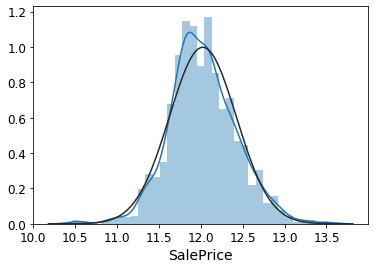

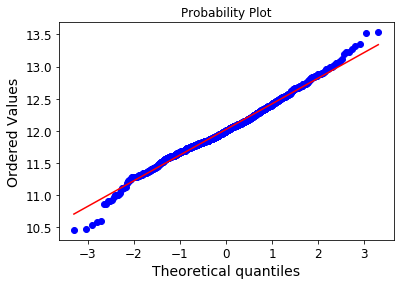

In [16]:

sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)



In [17]:
train_y = train["SalePrice"].copy()

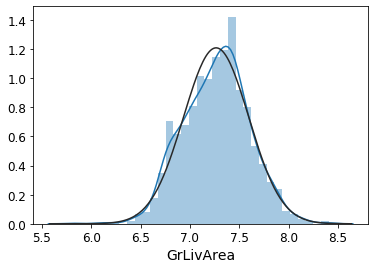

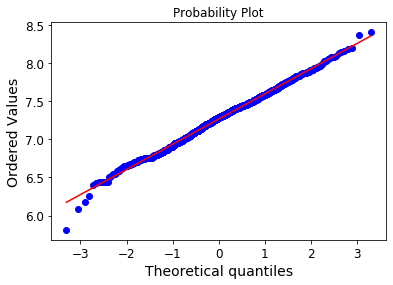

In [18]:
train['GrLivArea'] = np.log(train['GrLivArea'])

sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

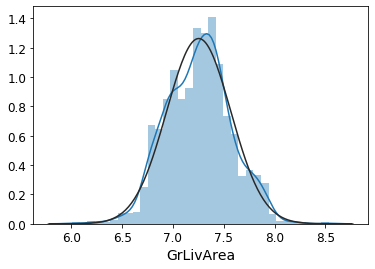

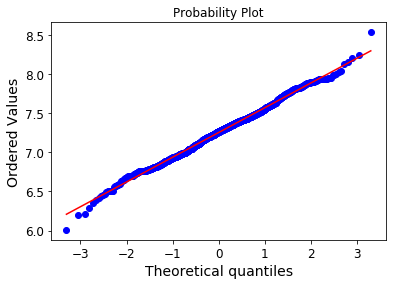

In [19]:
test['GrLivArea'] = np.log(test['GrLivArea'])

sns.distplot(test['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(test['GrLivArea'], plot=plt)

In [20]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.821404
GrLivArea        0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.496179
Fireplaces       0.491998
MasVnrArea       0.430569
BsmtFinSF1       0.392283
LotFrontage      0.351551
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
ScreenPorch      0.121245
PoolArea         0.074338
MoSold           0.057064
3SsnPorch        0.054914
BsmtFinSF2       0.004863
BsmtHalfBath    -0.005124
Id              -0.017774
MiscVal         -0.020012
OverallCond     -0.036821
YrSold          -0.037151
LowQualFinSF    -0.037951
MSSubClass      -0.073969
KitchenAbvGr    -0.147534
EnclosedPorch   -0.149029
Name: SalePr

In [63]:
train2 = train[num_att + cat_att]
train2.info()
test2 = test[num_att + cat_att]
test2.info()

merged_df = pd.concat([train2, test2])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 48 columns):
MSSubClass       1458 non-null int64
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
MasVnrArea       1458 non-null float64
BsmtFinSF1       1458 non-null int64
BsmtUnfSF        1458 non-null int64
TotalBsmtSF      1458 non-null int64
1stFlrSF         1458 non-null int64
2ndFlrSF         1458 non-null int64
GrLivArea        1458 non-null float64
BsmtFullBath     1458 non-null int64
FullBath         1458 non-null int64
HalfBath         1458 non-null int64
BedroomAbvGr     1458 non-null int64
KitchenAbvGr     1458 non-null int64
TotRmsAbvGrd     1458 non-null int64
Fireplaces       1458 non-null int64
GarageYrBlt      1458 non-null float64
GarageCars       1458 non-null int64
GarageArea       1458 non-null int

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
train_prepared = num_pipeline.fit_transform(train[num_att])
test_prepared  = num_pipeline.transform(test[num_att])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_att),
        ("cat", OneHotEncoder(), cat_att),
    ])

train_test_full_prepared = full_pipeline.fit_transform(merged_df)
train_full_prepared = full_pipeline.transform(train2)
test_full_prepared = full_pipeline.transform(test2)


In [65]:
print(train_prepared.shape)
print(test_prepared.shape)
print(train_full_prepared.shape)
print(test_full_prepared.shape)

(1458, 28)
(1459, 28)
(1458, 151)
(1459, 151)


In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(bootstrap=False, n_estimators=250, max_features=32, random_state=42)
forest_reg.fit(train_full_prepared, train_y)

housing_predictions = forest_reg.predict(train_full_prepared)

forest_mse = mean_squared_error(train_y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0014835428924059406

In [70]:
print(housing_predictions[0])
print(train_y[0])

12.247694320220953
12.247694320220994


In [71]:
train_y_normal = np.e**train_y
pred_normal = np.e**housing_predictions

forest_mse = mean_squared_error(train_y_normal, pred_normal)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

207.18848904200559

In [72]:
print(train_y_normal[0])
print(pred_normal[0])

208500.0
208499.99999999147


In [73]:
# forest_reg.feature_importances_

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = []
for a in cat_encoder.categories_:
    for b in a:
        cat_one_hot_attribs.append(b)
# print(cat_one_hot_attribs)
attributes = num_att + cat_one_hot_attribs
sorted(zip(forest_reg.feature_importances_, attributes), reverse=True)

[(0.18577090417460002, 'OverallQual'),
 (0.13891531454819625, 'GrLivArea'),
 (0.07625259281567563, 'YearBuilt'),
 (0.05926143140878795, 'TotalBsmtSF'),
 (0.05466332268614293, 'GarageCars'),
 (0.05076463730806918, 'GarageArea'),
 (0.04620381018532871, '1stFlrSF'),
 (0.04214408686991224, 'TA'),
 (0.03349346983125256, 'FullBath'),
 (0.03155863490087278, 'GarageYrBlt'),
 (0.0237835092642975, 'YearRemodAdd'),
 (0.022583730272542738, 'BsmtFinSF1'),
 (0.022228078455236142, 'LotArea'),
 (0.01944618208462638, 'Fireplaces'),
 (0.01885147643436039, '2ndFlrSF'),
 (0.011037878248445616, 'TotRmsAbvGrd'),
 (0.01022935174851162, 'OverallCond'),
 (0.010060741409738274, 'LotFrontage'),
 (0.00964579771013803, 'Y'),
 (0.009573100734886581, 'PConc'),
 (0.009430379006591504, 'N'),
 (0.008981403882335348, 'Gd'),
 (0.007318584378565661, 'BsmtUnfSF'),
 (0.005751382002469147, 'Ex'),
 (0.005659850763662558, 'Ex'),
 (0.005518141071170666, 'OpenPorchSF'),
 (0.005495137891772979, 'MasVnrArea'),
 (0.0046376608961660

In [74]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("std:", scores.std())

forest_reg = RandomForestRegressor(bootstrap=False, n_estimators=200, max_features=32, random_state=42)
forest_reg.fit(train_full_prepared, train_y)

forest_scores = cross_val_score(forest_reg, train_full_prepared, train_y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

print(pd.Series(forest_rmse_scores).describe())

scores: [0.12986371 0.12364568 0.13621807 0.14255757 0.15948654 0.11135552
 0.12798293 0.11258185 0.11731919 0.13602411]
mean: 0.12970351839228514
std: 0.013991068689328761
count    10.000000
mean      0.129704
std       0.014748
min       0.111356
25%       0.118901
50%       0.128923
75%       0.136170
max       0.159487
dtype: float64


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # sprawdza 12 (3×4) kombinacji hiperparametrów
    {'n_estimators': [30, 100, 150, 200, 250, 300], 'max_features': [16, 32, 64, 128]},
    # następnie sprawdza 6 (2×3) kombinacji z wyłączonym parametrem bootstrap (False)
    {'bootstrap': [False], 'n_estimators': [30, 100, 150, 200, 250, 300], 'max_features': [16, 32, 64, 128]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# przeprowadza proces uczenia na pięciu podzbiorach, czyli łącznie (12+6)*5=90 przebiegów 
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_full_prepared, train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [16, 32, 64, 12

In [53]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 32, 'n_estimators': 250}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=32, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [55]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.14287262321453223 {'max_features': 16, 'n_estimators': 30}
0.1375943272905592 {'max_features': 16, 'n_estimators': 100}
0.1367992946897429 {'max_features': 16, 'n_estimators': 150}
0.1366406487038284 {'max_features': 16, 'n_estimators': 200}
0.13627871512683598 {'max_features': 16, 'n_estimators': 250}
0.1365328585263724 {'max_features': 16, 'n_estimators': 300}
0.13513951516687214 {'max_features': 32, 'n_estimators': 30}
0.13342695362298643 {'max_features': 32, 'n_estimators': 100}
0.13286207079919438 {'max_features': 32, 'n_estimators': 150}
0.13281012059853417 {'max_features': 32, 'n_estimators': 200}
0.1324680025308187 {'max_features': 32, 'n_estimators': 250}
0.1325251458553907 {'max_features': 32, 'n_estimators': 300}
0.13696309202752208 {'max_features': 64, 'n_estimators': 30}
0.13423848089656287 {'max_features': 64, 'n_estimators': 100}
0.133607246772335 {'max_features': 64, 'n_estimators': 150}
0.1332743161026687 {'max_features': 64, 'n_estimators': 200}
0.1330358163059922 {

In [56]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.84868240e-03, 1.51662031e-02, 2.89090497e-02, 1.90076584e-01,
       1.06325724e-02, 7.53063906e-02, 2.28700219e-02, 9.36056356e-03,
       2.73385006e-02, 8.46911258e-03, 6.32070402e-02, 1.73017155e-02,
       1.38288045e-01, 3.72892307e-03, 5.08376088e-02, 3.43558952e-03,
       5.23114376e-03, 2.10645935e-03, 1.24637570e-02, 2.27432200e-02,
       3.95600114e-02, 6.19858401e-02, 5.54418322e-03, 7.11855907e-03,
       2.48405473e-03, 6.33238803e-05, 3.75739968e-06, 1.96059124e-04,
       5.22539761e-04, 5.04039733e-04, 4.08343192e-04, 1.50999947e-03,
       1.37856726e-03, 3.57462060e-04, 1.13809143e-03, 5.14654054e-04,
       3.04923835e-04, 5.65738143e-04, 3.95965794e-05, 3.73083407e-04,
       3.54846323e-04, 6.53309990e-04, 1.90494657e-03, 1.84038594e-04,
       4.88495366e-04, 1.90759811e-04, 4.76565294e-04, 2.79278149e-04,
       1.70335500e-04, 6.58316575e-05, 1.85416104e-03, 1.54671999e-04,
       3.95093588e-04, 2.88121763e-04, 2.60994675e-04, 7.19993699e-06,
      

In [57]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = []
for a in cat_encoder.categories_:
    for b in a:
        cat_one_hot_attribs.append(b)
# print(cat_one_hot_attribs)
attributes = num_att + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1900765841780207, 'OverallQual'),
 (0.13828804454495536, 'GrLivArea'),
 (0.0753063905672142, 'YearBuilt'),
 (0.06320704015314255, '1stFlrSF'),
 (0.06198584011213715, 'GarageCars'),
 (0.05821399968500283, 'TA'),
 (0.05083760878592161, 'FullBath'),
 (0.03956001137716887, 'GarageYrBlt'),
 (0.028909049739245286, 'LotArea'),
 (0.027338500564991885, 'BsmtFinSF1'),
 (0.02287002186448079, 'YearRemodAdd'),
 (0.02274322003635215, 'Fireplaces'),
 (0.01738836490201707, 'PConc'),
 (0.017301715472722676, '2ndFlrSF'),
 (0.015166203131958027, 'LotFrontage'),
 (0.012463757017717039, 'TotRmsAbvGrd'),
 (0.011256457859838287, 'N'),
 (0.010632572360049311, 'OverallCond'),
 (0.010297421318950247, 'Y'),
 (0.009360563555747894, 'MasVnrArea'),
 (0.008469112581798131, 'BsmtUnfSF'),
 (0.00748320528765743, 'Gd'),
 (0.007118559067085427, 'OpenPorchSF'),
 (0.006848682397914746, 'MSSubClass'),
 (0.005544183217830048, 'WoodDeckSF'),
 (0.005303518898182022, 'Ex'),
 (0.005231143762052662, 'BedroomAbvGr'),
 (0.00372

In [67]:
# y_pred = grid_search.predict(test_full_prepared)
y_pred = forest_reg.predict(test_full_prepared)
y_pred_normal = np.e**y_pred
sub = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_normal})

In [68]:
sub.to_csv("data/submission_script17_more_cat_att_2.csv", index=False)

In [69]:
sub.shape

(1459, 2)